# Laborarbeit Künstliche Intelligenz

## Thema :  Evolutionary Computing & Constraint Satisfaction Problems

### Namen der Studierenden: Michael Dehm & Tim Teller

(Hinweis: Es sind Namen anzugeben und keine Matrikelnummern. Matrikelnummern werden ausschließlich bei Klausuren zur Anonymisierung verwendet)

# Installs

In [2]:
%pip install seaborn matplotlib pandas deap python-constraint ortools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
from collections import Counter
import random
from copy import deepcopy

# Einlesen der Konfigurations-Datei für Ihre Aufgabe
def load_configuration():
    with open('configuration_003.json', 'r') as file:
        return json.load(file)

configuration = load_configuration()

#### Die Konfiguration betrachten

In [4]:
def print_configuration(configuration):
    
    print("\nAusführliche Konfiguration:\n")
    
    print("Studiengänge und Kursgruppenanzahlen:")
    for program, groups in configuration['study_programs'].items():
        print(f"- {program}: {groups} Kursgruppen")
    
    print("\nPrüfungswochen und zugeordnete Studiengänge:")
    for week, programs in configuration['exam_weeks'].items():
        print(f"- {week}: {', '.join(programs)}")
    
    print("\nZeitslots mit Beliebtheit:")
    for slot, details in configuration['time_slots'].items():
        print(f"- {slot} ({details['time']}): Beliebtheit {details['popularity']}")
    
    print("\nTage der Woche mit Beliebtheit:")
    for day, details in configuration['days'].items():
        print(f"- {day}: Beliebtheit {details['popularity']}")
    
    print("\nBeliebtheit von Raumzuteilungen:")
    print(f"- Parallel zugeteilte Räume: Beliebtheit {configuration['room_popularity']['parallel']}")
    print(f"- Zeitlich hintereinander zugeteilte Räume: Beliebtheit {configuration['room_popularity']['sequential']}")


In [5]:
print_configuration(configuration)


Ausführliche Konfiguration:

Studiengänge und Kursgruppenanzahlen:
- INF: 6 Kursgruppen
- ET: 5 Kursgruppen
- ES: 1 Kursgruppen
- MB: 2 Kursgruppen
- MT: 3 Kursgruppen
- WIW: 3 Kursgruppen

Prüfungswochen und zugeordnete Studiengänge:
- Week 1: MB, MT, ES, ET, WIW, INF
- Week 2: MB, ET, INF, MT, WIW, ES
- Week 3: WIW, INF, ES
- Week 4: WIW, ET, ES, MB, MT, INF
- Week 5: MB, WIW, ET, INF
- Week 6: MT, ES, ET, INF
- Week 7: ET, WIW, MB, INF, ES, MT
- Week 8: MT, INF, ES

Zeitslots mit Beliebtheit:
- Slot A (8:00-10:00): Beliebtheit 5
- Slot B (10:30-12:30): Beliebtheit 6
- Slot C (13:00-15:00): Beliebtheit 4
- Slot D (15:30-17:30): Beliebtheit 1

Tage der Woche mit Beliebtheit:
- Monday: Beliebtheit 6
- Tuesday: Beliebtheit 5
- Wednesday: Beliebtheit 6
- Thursday: Beliebtheit 5
- Friday: Beliebtheit 3

Beliebtheit von Raumzuteilungen:
- Parallel zugeteilte Räume: Beliebtheit 7
- Zeitlich hintereinander zugeteilte Räume: Beliebtheit 5


Die hier angegebenen Beliebtheitswerte fließen in die Bewertungsfunktion ein, die von Ihnen noch anzupassen ist.

In [6]:
# Nur als Beispiel und zur Veranschaulichung ... zufällige Zuteilung generieren
import random


def random_assign_timeslots(week_number, configuration):
    study_programs = configuration['exam_weeks'].get(f"Week {week_number}", [])
    
    # Struktur für die Zuteilung: Dict of days containing list of slots each with two rooms
    schedule = {day: {slot: [None, None] for slot in configuration['time_slots']} for day in configuration['days']}
    
    # Erstelle eine Liste aller Zeit-Slot Kombinationen für eine Woche
    time_slot_combinations = [(day, slot) for day in schedule for slot in schedule[day]]
    
    # Verteile die Studiengänge zufällig, bis alle Slots gefüllt sind
    for (day, slot) in time_slot_combinations:
        for i in range(2):  # Zwei Räume pro Slot
            program = random.choice(study_programs)
            schedule[day][slot][i] = program
    
    return schedule

def print_schedule(schedule):
    days = list(schedule.keys())
    slots = list(schedule[days[0]].keys())
    
    # Erste Zeile: Tage der Woche
    day_line = "Zeit / Tage  " + "".join([f"{day:^20}" for day in days])
    
    # Zweite Zeile: Räume unter jedem Tag anzeigen
    room_line = " " * 12 + "".join([f"{'R1':^10}{'R2':^10}" for _ in days])
    
    line_length = len(day_line)
    line = "-" * line_length
    
    print(line)
    print(day_line)
    print(room_line)
    print(line)

    for slot in slots:
        print(f"{slot:^10} ", end="")
        for day in days:
            rooms = schedule[day][slot]
            r1, r2 = rooms[0], rooms[1]
            print(f"{r1:^10}{r2:^10}", end="")
        print()
    print(line)



In [7]:
# Beispiel für Verwendung

week_number = 2  # Zum Beispiel die erste Prüfungswoche
schedule = random_assign_timeslots(week_number, configuration)
print(schedule)
print_schedule(schedule)

{'Monday': {'Slot A': ['MT', 'ET'], 'Slot B': ['ET', 'WIW'], 'Slot C': ['MT', 'ES'], 'Slot D': ['MB', 'MB']}, 'Tuesday': {'Slot A': ['ET', 'ES'], 'Slot B': ['ET', 'WIW'], 'Slot C': ['INF', 'INF'], 'Slot D': ['MT', 'ET']}, 'Wednesday': {'Slot A': ['ES', 'MB'], 'Slot B': ['MT', 'MB'], 'Slot C': ['MB', 'MT'], 'Slot D': ['MT', 'MT']}, 'Thursday': {'Slot A': ['INF', 'ET'], 'Slot B': ['ET', 'WIW'], 'Slot C': ['MT', 'MB'], 'Slot D': ['ES', 'MT']}, 'Friday': {'Slot A': ['MB', 'WIW'], 'Slot B': ['MT', 'ET'], 'Slot C': ['INF', 'ET'], 'Slot D': ['MB', 'ET']}}
-----------------------------------------------------------------------------------------------------------------
Zeit / Tage         Monday             Tuesday            Wednesday            Thursday             Friday       
                R1        R2        R1        R2        R1        R2        R1        R2        R1        R2    
--------------------------------------------------------------------------------------------------------

## Aufgabenteil 1: Evolutionary Computing

Entwerfen Sie ein KI Modell auf Basis des Evolutionary Computing und setzen
Sie dieses als Jupyter Notebook um. Insbesondere werden eine geeignete Repräsentation
sowie eine geeignete Fitness-Funktion benötigt.

In [8]:

from deap import algorithms, base, creator, tools

### 1. Modell anlegen

- Individuenformat festlegen
- Fitnessfunktion festlegen
- Mutation und Crossover geeignet wählen
- ... weitere Parameter

In [9]:
# Individuum definieren
# Ihr Code 

# print(schedule)
print_schedule(schedule)

def calc_unfairness(scores_by_study_program):
    vals = list(scores_by_study_program.values())
    var = np.var(vals)
    return var

def calc_fittnes(schedule,week_number,configuration):
    day_num = len(configuration['days'])
    room_num = 2
    slot_num = len(configuration['time_slots'])
    total_slots = day_num*room_num*slot_num

    programs_this_week = configuration['exam_weeks'][f'Week {week_number}']
    courses_per_program = configuration['study_programs']

    total_courses = 0
    for study_program in programs_this_week:
        total_courses += courses_per_program[study_program]
    
    proportional_slots = {}
    for study_program in programs_this_week:
        proportional_slots[study_program] = courses_per_program[study_program]/total_courses * total_slots
    
    all_values = []
    for day_slots in schedule.values():
        for slot in day_slots.values():
            all_values.extend(slot)

    count = Counter(all_values)
    actual_slots = dict(count)

    # print(week_number,programs_this_week)
    # print(proportional_slots)
    # print(actual_slots)

    unproportional_slots_penalty = 0
    for study_program in actual_slots:
        unproportional_slots_penalty += np.abs(actual_slots[study_program]-proportional_slots[study_program])*10
    
    parallel_popularity_scores_by_study_program = {}
    consecutive_popularity_scores_by_study_program = {}
    day_popularity_scores_by_study_program = {}
    slot_popularity_scores_by_study_program = {}
    for study_program in programs_this_week:
        parallel_popularity_scores_by_study_program[study_program] = 0
        consecutive_popularity_scores_by_study_program[study_program] = 0
        day_popularity_scores_by_study_program[study_program] = 0
        slot_popularity_scores_by_study_program[study_program] = 0

    big_course_parallel_popularity = configuration['room_popularity']['parallel']
    for day in schedule:
        for slot in schedule[day]:
            parallel_rooms_by_study_program = Counter(schedule[day][slot])
            for study_program in dict(parallel_rooms_by_study_program):
                if courses_per_program[study_program] > 1 and parallel_rooms_by_study_program[study_program] > 1:
                    parallel_popularity_scores_by_study_program[study_program] += big_course_parallel_popularity

    course_consecutive_popularity = configuration['room_popularity']['sequential']
    for day in schedule:
        for i in range(1,len(schedule[day])):
            prev_key = list(schedule[day])[i-1]
            key = list(schedule[day])[i]
            prev_slot = schedule[day][prev_key]
            slot = schedule[day][key]
            for k in range(0,room_num):
                if(slot[k] in prev_slot):
                    consecutive_popularity_scores_by_study_program[slot[k]] += course_consecutive_popularity
    
    for day in schedule:
        for slot in schedule[day]:
            for study_program in schedule[day][slot]:
                day_popularity = configuration['days'][day]['popularity']
                slot_popularity = configuration['time_slots'][slot]['popularity']
                day_popularity_scores_by_study_program[study_program] += day_popularity
                slot_popularity_scores_by_study_program[study_program] += slot_popularity
                
    for study_program in programs_this_week:
        parallel_popularity_scores_by_study_program[study_program] /= courses_per_program[study_program]
        consecutive_popularity_scores_by_study_program[study_program] /= courses_per_program[study_program]
        day_popularity_scores_by_study_program[study_program] /= courses_per_program[study_program]
        slot_popularity_scores_by_study_program[study_program] /= courses_per_program[study_program]

    # delete score for study_programs with only one course, so the unfairnes score is not negativly impacted
    for study_program in programs_this_week:
        if courses_per_program[study_program] <= 1:
            del parallel_popularity_scores_by_study_program[study_program]

    # print(parallel_popularity_scores_by_study_program)
    # print(consecutive_popularity_scores_by_study_program)
    # print(day_popularity_scores_by_study_program)
    # print(slot_popularity_scores_by_study_program)

    number_of_days_by_program = {}
    for program in programs_this_week:
        number_of_days_by_program[program] = 0

    for day in schedule:
        programs_this_day = []
        for slot in schedule[day]:
            for program in schedule[day][slot]:
                programs_this_day.append(program)
        for program in number_of_days_by_program:
            if program in programs_this_day:
                number_of_days_by_program[program] += 1
    
    slot_not_every_day_penalty = day_num*len(programs_this_week)
    for program in number_of_days_by_program:
        slot_not_every_day_penalty -= number_of_days_by_program[program]


    early_late_slots_penalty_factor = 10
    early_late_slots_penalty = 0
    for i in range(1,len(schedule)):
        prev_day = list(schedule)[i-1]
        day = list(schedule)[i]
        last_slot_prey_day = list(schedule[prev_day].values())[-1]
        first_slot_this_day = list(schedule[day].values())[0]
        # print(prev_day,day)
        # print(last_slot_prey_day,first_slot_this_day)
        for program in last_slot_prey_day:
            if program in first_slot_this_day:
                early_late_slots_penalty += early_late_slots_penalty_factor
    # print(early_late_slots_penalty)
    unfairness_slot_not_every_day = calc_unfairness(number_of_days_by_program)
    unfairness_parallel_popularity_scores = calc_unfairness(parallel_popularity_scores_by_study_program)
    unfairness_consecutive_popularity_scores = calc_unfairness(consecutive_popularity_scores_by_study_program)
    unfairness_day_popularity_scores = calc_unfairness(day_popularity_scores_by_study_program)
    unfairness_slot_popularity_scores = calc_unfairness(slot_popularity_scores_by_study_program)

    # print(unfairness_parallel_popularity_scores)
    # print(unfairness_consecutive_popularity_scores)
    # print(unfairness_day_popularity_scores)
    # print(unfairness_slot_popularity_scores)

    # print(number_of_days_by_program)
    # print(unfairness_slot_not_every_day)
    # print(slot_not_every_day_penalty)

    
    parallel_popularity_score_total = sum(list(parallel_popularity_scores_by_study_program.values()))
    consecutive_popularity_score_total = sum(list(consecutive_popularity_scores_by_study_program.values()))
    day_popularity_score_total = sum(list(day_popularity_scores_by_study_program.values()))
    slot_popularity_score_total = sum(list(slot_popularity_scores_by_study_program.values()))

    total_score     =   parallel_popularity_score_total \
                    +   consecutive_popularity_score_total \
                    +   day_popularity_score_total \
                    +   slot_popularity_score_total \
                    -   unfairness_parallel_popularity_scores \
                    -   unfairness_consecutive_popularity_scores \
                    -   unfairness_day_popularity_scores \
                    -   unfairness_slot_popularity_scores \
                    -   unproportional_slots_penalty \
                    -   unfairness_slot_not_every_day \
                    -   slot_not_every_day_penalty \
                    -   early_late_slots_penalty
    # print(total_score)
    return total_score

# print(schedule)


def mutate_schedule(schedule, week_number, configuration, mutation_probability=0.2):
    from copy import deepcopy
    import random

    room_num = 2
    new_schedule = deepcopy(schedule)

    programs_this_week = configuration['exam_weeks'][f'Week {week_number}']

    all_positions = [
        (day, slot, room)
        for day in new_schedule
        for slot in new_schedule[day]
        for room in range(room_num)
    ]

    if random.random() < mutation_probability:
        mutation_type = random.choice(['swap', 'replace'])

        if mutation_type == 'swap':
            pos1, pos2 = random.sample(all_positions, 2)
            d1, s1, r1 = pos1
            d2, s2, r2 = pos2
            new_schedule[d1][s1][r1], new_schedule[d2][s2][r2] = \
                new_schedule[d2][s2][r2], new_schedule[d1][s1][r1]

        elif mutation_type == 'replace':
            d, s, r = random.choice(all_positions)
            new_schedule[d][s][r] = random.choice(programs_this_week)

    return new_schedule

def crossover_schedules(parent1, parent2):
    child1 = deepcopy(parent1)
    child2 = deepcopy(parent2)

    days = list(parent1.keys())
    crossover_day = random.choice(days)

    # Austausch ab crossover_day
    switch = False
    for day in days:
        if day == crossover_day:
            switch = True
        if switch:
            child1[day], child2[day] = deepcopy(parent2[day]), deepcopy(parent1[day])

    return child1, child2







-----------------------------------------------------------------------------------------------------------------
Zeit / Tage         Monday             Tuesday            Wednesday            Thursday             Friday       
                R1        R2        R1        R2        R1        R2        R1        R2        R1        R2    
-----------------------------------------------------------------------------------------------------------------
  Slot A       MT        ET        ET        ES        ES        MB       INF        ET        MB       WIW    
  Slot B       ET       WIW        ET       WIW        MT        MB        ET       WIW        MT        ET    
  Slot C       MT        ES       INF       INF        MB        MT        MT        MB       INF        ET    
  Slot D       MB        MB        MT        ET        MT        MT        ES        MT        MB        ET    
-------------------------------------------------------------------------------------------------

# Evolution

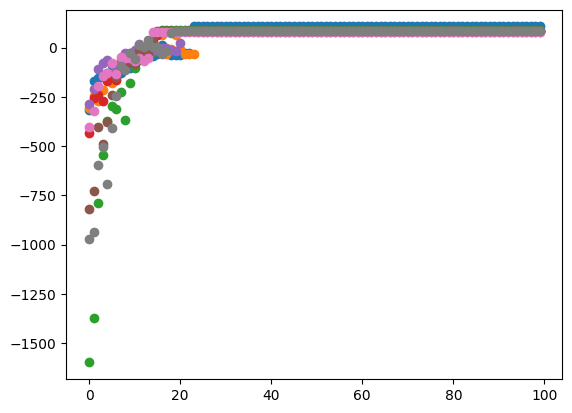

-----------------------------------------------------------------------------------------------------------------
Zeit / Tage         Monday             Tuesday            Wednesday            Thursday             Friday       
                R1        R2        R1        R2        R1        R2        R1        R2        R1        R2    
-----------------------------------------------------------------------------------------------------------------
  Slot A      INF        ET       INF        ET        ET        ET       INF        ET        MB        MB    
  Slot B      WIW        MT       INF        MT       WIW        ET       INF        ET       WIW        ES    
  Slot C       MB        ES        ET        MT       INF       INF       INF        ET       WIW       WIW    
  Slot D      WIW        MB       INF        MT        MT       INF        ET        MT       INF       INF    
-------------------------------------------------------------------------------------------------

In [10]:
import random
import matplotlib.pyplot as plt

start_week = 1
end_week = 8
generations_range = range(0, 100)
population_size = 100

populations_by_week = {}
population_scores_by_week = {}
best_scores_by_week = {}
best_schedule_by_week = {}

for week_number in range(start_week, end_week + 1):
    populations_by_week[week_number] = []
    population_scores_by_week[week_number] = []
    best_scores_by_week[week_number] = []
    best_schedule_by_week[week_number] = None

    for _ in range(population_size):
        schedule = random_assign_timeslots(week_number, configuration)
        populations_by_week[week_number].append(schedule)
        population_scores_by_week[week_number].append(calc_fittnes(schedule, week_number, configuration))

for week_number in range(start_week, end_week + 1):
    population = populations_by_week[week_number]
    population_scores = population_scores_by_week[week_number]

    for _ in generations_range:
        sorted_population = [x for _, x in sorted(zip(population_scores, population), key=lambda pair: pair[0], reverse=True)]
        top_half = sorted_population[:population_size // 2]

        new_population = []
        while len(new_population) < population_size // 2:
            parent1, parent2 = random.sample(top_half, 2)
            child1, child2 = crossover_schedules(parent1, parent2)
            new_population.append(child1)
            if len(new_population) < population_size // 2:
                new_population.append(child2)

        population = top_half + new_population
        population_scores = [calc_fittnes(ind, week_number, configuration) for ind in population]

        populations_by_week[week_number] = population
        population_scores_by_week[week_number] = population_scores
        best_scores_by_week[week_number].append(min(population_scores))
        best_schedule_by_week[week_number] = population[population_scores.index(min(population_scores))]

for week_number in range(start_week, end_week + 1):
    plt.scatter(generations_range, best_scores_by_week[week_number])
plt.show()

for week_number in range(start_week, end_week + 1):
    print_schedule(best_schedule_by_week[week_number])

#### Erläuterung / Begründung zur Modellierung von Individuen

<...Ihr Text ...>

In [11]:
# Fitnessfunktion definieren
# Ihr Code



#### Erläuterung / Begründung zur Fitnessfunktion

<...Ihr Text ...>

In [12]:

# Modell ersetzen durch eigenes für diese Aufgabe

# Erstelle die Basisobjekte für DEAP

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 100)  # Erzeuge zufällige Integer zwischen 1 und 10
toolbox.register("individual", tools.initRepeat, creator.Individual, 
                 toolbox.attr_int, n=4)  # Erzeuge ein Individuum mit 4 Integern
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate) # Ihre zentrale Stelle ...

NameError: name 'evaluate' is not defined

Ein Beispiel wie ausgewertet werden kann. Die Bewertung einer Verletzung der proportionalen Raumzuteilung ist mit -10 festgesetzt (nicht ändern).

In [ ]:
def count_slots(schedule):
    slot_count = {}
    
    for day, slots in schedule.items():
        for slot, rooms in slots.items():
            for program in rooms:
                if program not in slot_count:
                    slot_count[program] = 0
                slot_count[program] += 1
    
    return slot_count

def calculate_slot_allocation(week_number, configuration):
    study_programs = configuration['exam_weeks'].get(f"Week {week_number}", [])
    total_courses = sum(configuration['study_programs'][program] for program in study_programs)
    
    # Berechne die proportionalen Slots
    slot_allocation = {}
    for program in study_programs:
        num_courses = configuration['study_programs'][program]
        slot_allocation[program] = round((num_courses / total_courses) * 40)
    return slot_allocation
    
def evaluate_schedule(schedule, configuration):
    # Bewertung basierend auf der Popularität der Slots und Tage
    slot_popularity = configuration['time_slots']
    day_popularity = configuration['days']
    
    score = 0
    for day, slots in schedule.items():
        day_score = day_popularity[day]['popularity']
        for slot, rooms in slots.items():
            slot_score = slot_popularity[slot]['popularity']
            # Addiere die Beliebtheitswerte jedes belegten Slots
            if all(rooms):  # Nur wenn beide Slots belegt sind
                score += (day_score + slot_score)
    
    return score
# Zähle die Slots, die den Studiengängen zugewiesen wurden
slot_counts = count_slots(schedule)
print("Slot-Zuweisung pro Studiengang:", slot_counts)

# Berechne die proportionalen Slot-Zuteilungen
slot_allocations = calculate_slot_allocation(week_number, configuration)
print("Proportionale Slot-Zuteilung pro Studiengang:", slot_allocations)

# Bewertungsfunktion
schedule_score = evaluate_schedule(schedule, configuration)
print("Bewertung des Zeitplans:", schedule_score)

def calculate_differences_and_penalty(slot_counts, slot_allocations):
    differences = {}
    total_penalty = 0
    
    for program in slot_allocations:
        allocated_slots = slot_allocations.get(program, 0)
        counted_slots = slot_counts.get(program, 0)
        
        difference = counted_slots - allocated_slots
        differences[program] = difference
        
        # Berechne die Strafe basierend auf der Abweichung
        penalty = abs(difference) * -10
        total_penalty += penalty
    
    return differences, total_penalty
    
# Berechnungen durchführen
slot_counts = count_slots(schedule)
slot_allocations = calculate_slot_allocation(week_number, configuration)

# Abweichungen und Strafen berechnen
differences, total_penalty = calculate_differences_and_penalty(slot_counts, slot_allocations)

# Ausgabe
print("Abweichungen pro Studiengang:", differences)
print("Gesamtstrafen:", total_penalty)
print("Gesamtbewertung:", total_penalty+schedule_score)

Slot-Zuweisung pro Studiengang: {'INF': 11, 'ES': 16, 'MT': 13}
Proportionale Slot-Zuteilung pro Studiengang: {'MT': 12, 'INF': 24, 'ES': 4}
Bewertung des Zeitplans: 180
Abweichungen pro Studiengang: {'MT': 1, 'INF': -13, 'ES': 12}
Gesamtstrafen: -260
Gesamtbewertung: -80


In [ ]:
# Population wählen 

### Begründung zum Modell

<...Ihr Text...>

### 2. Test und Bewertung 

Testen Sie die Funktionsweise Ihres Modells und diskutieren Sie die Ergebnisse.

In [ ]:
# Ihr Code



### Diskussion der Ergebnisse 

<...Ihr Text...>

## Aufgabenteil 2: Constraint Satisfaction Problems

Entwerfen Sie ein KI Modell auf Basis von Constraints und setzen Sie dieses als
Jupyter Notebook um. Wählen Sie geeignete Constraints.

In [ ]:
from constraint import *
# from ortools.sat.python import cp_model    # Alternative Library (schneller)

### 1. Variablen bestimmen 

... und ihre Wertebereiche!

In [15]:
# Beispiel - hier soll Ihr Code eingefügt werden
from constraint import *

# CSP initialisieren
csp = Problem()
start_week = 1
end_week = 8
days = list(configuration['days'].keys())
rooms = ['A','B']
slots = [1,2,3,4]

for week in range(start_week,end_week+1):
    for room in rooms:
        for day in days:
            for slot in slots:
                csp.addVariable(f"slot_{slot}_room_{room}_{day}_week_{week}", configuration['exam_weeks'][f'Week {week}'])
                print(f"slot_{slot}_room_{room}_{day}_week_{week}", configuration['exam_weeks'][f'Week {week}'])

# #Variablen definieren und Wertebereiche festlegen
# csp.addVariable("A", [i for i in range(0,25+1)])
# csp.addVariable("B", [i for i in range(0,100+1)])
# csp.addVariable("C", [i for i in range(0,20+1)])
# csp.addVariable("D", [i for i in range(0,10+1)])

# am Schluss kurz alle Kombinationen ausgeben (zur Kontrolle)

# csp.getSolutions()

slot_1_room_A_Monday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_2_room_A_Monday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_3_room_A_Monday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_4_room_A_Monday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_1_room_A_Tuesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_2_room_A_Tuesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_3_room_A_Tuesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_4_room_A_Tuesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_1_room_A_Wednesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_2_room_A_Wednesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_3_room_A_Wednesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_4_room_A_Wednesday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_1_room_A_Thursday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_2_room_A_Thursday_week_1 ['MB', 'MT', 'ES', 'ET', 'WIW', 'INF']
slot_3_room_A_Thursday_week_1 ['MB', 'MT',

### Begründung zur Wahl der Variablen

Da jeder Zeitslot einer Prüfungswoche von verschiedenen Studiengängen belegt werden kann, ist es sinnvoll, die Slots als Variablen zu modellieren. Der jeweilige Wertebereich dieser Variablen umfasst die Studiengänge, die in der entsprechenden Woche Prüfungen abhalten können.

### 2. Constraints bestimmen

Hier liegt sicher die Hauptaufgabe. Zur Umsetzung als CSP ist ein geeigneter Fairnessrahmen als Grenzwert anzugeben (und als Constraint umzusetzen)

In [ ]:
from collections import Counter
study_programs_with_more_than_one_course = [k for k, v in configuration['study_programs'].items() if v > 1]

def sync_parallel_rooms(val1, val2):
    if val1 in study_programs_with_more_than_one_course:
        return val1 == val2
    return True

for week in range(start_week, end_week+1):
    for day in days:
        for slot in slots:
            var1 = f"slot_{slot}_room_A_{day}_week_{week}"
            var2 = f"slot_{slot}_room_B_{day}_week_{week}"
            csp.addConstraint(sync_parallel_rooms, (var1, var2))


def proportional_distribution(*values):
    counts = Counter(values)
    total = sum(counts.values())
    for prog, required in configuration['study_programs'].items():
        if required == 0:
            continue
        actual = counts.get(prog, 0)
        expected_ratio = required / sum(configuration['study_programs'].values())
        if abs(actual / total - expected_ratio) > 0.1:
            return False
    return True

for week in range(start_week, end_week+1):
    for day in days:
        week_vars = [f"slot_{slot}_room_{room}_{day}_week_{week}" for room in rooms for slot in slots]
        csp.addConstraint(proportional_distribution, week_vars)

solutions = csp.getSolutions()
print(solutions)

KeyboardInterrupt: 

### Begründungen 

<...Ihr Text...>

### 3. Test und Bewertung

Wie gut ist die Lösung? Prüfen Sie Ihre Konfiguration (u.a. abhängig von Constraint und Variablenwahl) und testen Sie geeignet. 

In [ ]:
# Ihr Code


### Diskussion der Ergebnisse 

<...Ihr Text...>

# Abschluss

Vergleich der beiden Verfahren. Ggf. ist hier noch Code zum Vergleich zu ergänzen, ansonsten weitgehend durch Text.

<...Ihr Text...>